In [6]:
import matplotlib   # library for plotting
import matplotlib.pyplot as plt #  later you will type plt.$COMMAND
import numpy as np   # basic math library  you will type np.$STUFF  e.g., np.cos(1)
import pandas as pd  # library for data analysis for text files (everything but netcdf files)
import scipy.stats as stats # imports stats functions https://docs.scipy.org/doc/scipy/reference/stats.html 
from netCDF4 import Dataset

Question 1a:

In [7]:
# Define variables
negrate = 0.9 # Background negative rate
posrate = 0.1 # Background positive rate
accrate = 0.8 # Percentage of covid tests that are correct
failrate = 0.2 # Percentage of covid tests that are incorrect
test_result = 'negative'
def Bayes(negrate,posrate,accrate,failrate):
    Pr_true_result = (negrate*accrate)/(negrate*accrate + posrate*failrate)
    return Pr_true_result*100
answer = Bayes(negrate,posrate,accrate,failrate)
print("The probability that the friend was actually negative is " + str(np.round(answer,2)) + "%")

The probability that the friend was actually negative is 97.3%


Reasoning: Covid tests are accurate 80% of the time, but the background rate must also be considered. 90% of people do not have covid, so it is even more likely that the friend does not have covid when they tested negative. Bayes theorem factors in this information and tells us that the chance of the friend being negative is 97.3%.

Question 1b:


5 steps:

1. State the significance level (alpha): .05, .01
2. State the null hypothesis H0 and the alternative H1: H0: The sample mean is not significantly different from 0. H1: The sample mean is significantly different from 0.
3. State the statistic to be used and the assumptions required to use it: z statistic, assume normal distribution
4. State the critical region: -1.96 < z < 1.96, -2.58 < z < 2.58
5. Evaluate the statistic and state the conclusion: 


In [8]:
N = 15
values = np.random.randn(N)
sigma = 1
mean = 0
sample_mean = np.mean(values)
def z_statistic(mean,sample_mean,sigma,N):
    z = (sample_mean - mean)/(sigma/(np.sqrt(N)))
    return z
z = z_statistic(mean,sample_mean,sigma,N)
if -1.96 < z < 1.96:
    print("95% confidence, N = 15: We cannot reject the null hypothesis")
else:
    print("95% confidence, N = 15: We can reject the null hypothesis")
if -2.58 < z < 2.58:
    print("99% confidence, N = 15: We cannot reject the null hypothesis")
else:
    print("99% confidence, N = 15: We can reject the null hypothesis")
N = 1000
z = z_statistic(mean,sample_mean,sigma,N)
if -1.96 < z < 1.96:
    print("95% confidence, N = 1000: We cannot reject the null hypothesis")
else:
    print("95% confidence, N = 1000: We can reject the null hypothesis")
if -2.58 < z < 2.58:
    print("99% confidence, N = 1000: We cannot reject the null hypothesis")
else:
    print("99% confidence, N = 1000: We can reject the null hypothesis")

95% confidence, N = 15: We cannot reject the null hypothesis
99% confidence, N = 15: We cannot reject the null hypothesis
95% confidence, N = 1000: We can reject the null hypothesis
99% confidence, N = 1000: We can reject the null hypothesis


Question 1c:
I will be taking integrated water vapor (IWV) data from the HadAM4 historical climate simulation that uses radiative forcing from 2006. I will find the ensemble member with the highest mean IWV and perform a z test to see if that ensemble member mean IWV is significantly higher than mean IWV from the ensemble member with the lowest mean IWV. 

5 steps:

alpha = .05

H0: the sample mean with the maximum mean IWV is not significantly higher than the sample mean with the lowest mean IWV.

H1: the sample mean with the maximum mean IWV is significantly higher than the sample mean with the lowest mean IWV.

z statistic, assume normal distribution of daily mean IWV

critical region: z < 1.65

Evaluation below

In [9]:
# Step 1: Load in data and locate ensemble member with highest mean IWV
filename = 'hist_06.nc'
IWV = Dataset(filename).variables['TMQ'][:] # Already converted from TMQ to IWV by taking mass-weighted mean specific humidity and multiplying by (surface pressure / g)
i = 0
ensemblemeans = np.zeros(IWV.shape[0])
while i < IWV.shape[0]: # number of ensemble members
    ensemblemeans[i] = np.mean(IWV[i,:,:,:])
    i+=1
maxensemble = np.where(ensemblemeans == np.max(ensemblemeans))
minensemble = np.where(ensemblemeans == np.min(ensemblemeans))
print(maxensemble)
print(minensemble)

(array([29]),)
(array([27]),)


We find that the 30th ensemble member has the highest mean IWV and the 28th ensemble member has the lowest mean IWV.

In [10]:
# Step 2: Calculate variables required in z test and run z test
def z_statistic_sample(sample_mean1,sample_mean2,sigma1,sigma2,N1,N2):
    z = (sample_mean1 - sample_mean2)/np.sqrt(((sigma1*sigma1)/N1)+(sigma2*sigma2)/N2)
    return z
dailymean1 = np.zeros(120)
dailymean2 = np.zeros(120)
i = 0
while i < 120:
    dailymean1[i] = np.mean(IWV[29,i*4:(i*4 + 4),:,:]) # 6 hourly temporal resolution
    dailymean2[i] = np.mean(IWV[27,i*4:(i*4 + 4),:,:])
    i+=1
sample_mean1 = np.mean(dailymean1)
sample_mean2 = np.mean(dailymean2)
sigma1 = np.std(dailymean1)
sigma2 = np.std(dailymean2)
N1 = len(dailymean1)
N2 = len(dailymean2)
z = z_statistic_sample(sample_mean1,sample_mean2,sigma1,sigma2,N1,N2)
if z < 1.65:
    print("95% confidence: We cannot reject the null hypothesis")
else:
    print("95% confidence: We can reject the null hypothesis")

95% confidence: We can reject the null hypothesis


Question 1d: 

5 steps:

alpha = .05

H0: the sample with the maximum mean IWV is not significantly higher than the ensemble mean IWV.

H1: the sample mean with the maximum mean IWV is significantly higher than the ensemble mean IWV.

z statistic, assume normal distribution of IWV

critical region: z < 1.65

Evaluation below

In [11]:
dailymean = np.zeros(int(np.size(IWV[:,:,0,0])/4))
reshaped_IWV = np.reshape(IWV,[np.size(dailymean)*4,len(IWV[0,0,:,0]),len(IWV[0,0,0,:])])
i = 0
while i < len(dailymean):
    dailymean[i] = np.mean(reshaped_IWV[i*4:(i*4 + 4),:,:])
    i+=1

mean = np.mean(dailymean[:])
sigma = np.std(dailymean[:])
z = z_statistic(mean,sample_mean1,sigma,N1)
if z < 1.65:
    print("95% confidence: We cannot reject the null hypothesis")
else:
    print("95% confidence: We can reject the null hypothesis")

95% confidence: We can reject the null hypothesis


Question 1e: 
I will compare standard deviations between mean IWV in November-December of the first 51 ensemble members and mean IWV in January-February of the next 51 ensemble members

H0: The ensemble variability is not different between November-December and January-February.

H1: The ensemble variability is different between November-December and January-February

In [19]:
IWVnovdec = np.mean(IWV[0:61,0:240,:,:],axis=(1,2,3))
IWVjanfeb = np.mean(IWV[61:122,240:480,:,:],axis=(1,2,3))
sigma1 = np.std(IWVnovdec,axis=0)
sigma2 = np.std(IWVjanfeb,axis=0)

DF1 = 61 - 1
DF2 = 61 - 1
F = (sigma1*sigma1)/(sigma2*sigma2)
if F < 1.5343:
    print("95% confidence: We cannot reject the null hypothesis")
else:
    print("95% confidence: We can reject the null hypothesis")


95% confidence: We can reject the null hypothesis


Question 2a:

In [149]:
### Read in the data
filename='homework1_data.csv'
data=pd.read_csv(filename,sep=',')
R = data["R_inches"]
P = data["P_hPa"]
average_pressure = np.mean(P)
print("The average pressure in Fort Collins in 2014 was "+str(np.round(average_pressure,2))+" hPa")
Rainyindex = np.where(R>0.01)
Rainydaypressureavg = np.round(np.mean(P[Rainyindex[0][:]]),2)
print("The average pressure in Fort Collins in 2014 on rainy days was "+str(Rainydaypressureavg)+" hPa")

The average pressure in Fort Collins in 2014 was 846.33 hPa
The average pressure in Fort Collins in 2014 on rainy days was 846.82 hPa


Question 2b:

H0: The pressure is not different when raining

H1: The pressure is different when raining

In [158]:
sigma = np.std(P)
mean = np.mean(P)
sample_mean = Rainydaypressureavg
N = len(Rainyindex[0][:])
z = z_statistic(mean,sample_mean,sigma,N)
if -1.96 < z < 1.96:
    print("z statistic: We cannot reject the null hypothesis")
else:
    print("z statistic: We can reject the null hypothesis")
sample_sigma = np.std(P[Rainyindex[0][:]])
def t_test(mean,sample_mean,sample_sigma,N):
    t = (sample_mean - mean)/(sample_sigma/(np.sqrt(N-1)))
    return t
t = t_test(mean,sample_mean,sample_sigma,N)
if -1.98 < t < 1.98:
    print("t statistic: We cannot reject the null hypothesis")
else:
    print("t statistic: We can reject the null hypothesis")

z statistic: We cannot reject the null hypothesis
t statistic: We cannot reject the null hypothesis


The z statistic is appropriate because N > 30

Question 2c:

Minimum: 845.23
Maximum: 847.61
Mean: 846.33
Standard Deviation: 0.35


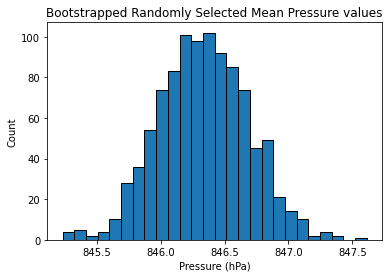

In [173]:
Nbs = 1000
P_Bootstrap=np.empty((Nbs,len(P[Rainyindex[0][:]])))
for ii in range(Nbs):
    P_Bootstrap[ii,:]=np.random.choice(P,len(P[Rainyindex[0][:]]))
P_Bootstrap_mean=np.mean(P_Bootstrap,axis=1)
binsize = 0.1
min4hist=np.round(np.min(P_Bootstrap_mean),1)-binsize
max4hist=np.round(np.max(P_Bootstrap_mean),1)+binsize
nbins=int((max4hist-min4hist)/binsize)

plt.hist(P_Bootstrap_mean,nbins,edgecolor='black')
plt.xlabel('Pressure (hPa)');
plt.ylabel('Count');
plt.title('Bootstrapped Randomly Selected Mean Pressure values');

print("Minimum: " + str(np.round(np.min(P_Bootstrap_mean),2)))
print("Maximum: " + str(np.round(np.max(P_Bootstrap_mean),2)))
print("Mean: " + str(np.round(np.mean(P_Bootstrap_mean),2)))
print("Standard Deviation: " + str(np.round(np.std(P_Bootstrap_mean),2)))


In [178]:
mean = np.mean(P_Bootstrap_mean)
sigma=np.std(P_Bootstrap_mean)
N = 1
z = z_statistic(mean,sample_mean,sigma,N)
if -1.96 < z < 1.96:
    print("z statistic: We cannot reject the null hypothesis")
else:
    print("z statistic: We can reject the null hypothesis")
prob=(1-stats.norm.cdf(np.abs(z)))*2*100
print("Probability of the mean value occuring by chance: " + str(np.round(prob,2)) + "%")

z statistic: We cannot reject the null hypothesis
Probability of the mean value occuring by chance: 16.53%
